### Resumo

Esse notebook tem como objetivo aplicar o k-means no nosso dataset reduzido pelo [jupyter notebook](https://github.com/Segmentation-Fault-Machine-Learning/ArticleClusteringProblem/blob/Felipe/Processando%20Dados.ipynb) disponível no github. 

In [1]:
import pandas as pd
import numpy as np 

# Configura o tamanho da imagem plotada
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 8)


Populating the interactive namespace from numpy and matplotlib


In [2]:
# importa o dataset 
data = pd.read_csv('data_remake.csv')

In [3]:
# Descrição 

print(data.head())
data.shape

  Unnamed: 0  abalon  abbeel  abbot  abbrevy  abc  abel  abernethy  abl  \
0     1987_1       0       0      0        0    0     0          0    2   
1     1987_2       0       0      0        0    0     0          0    1   
2     1987_3       0       0      0        0    0     0          0    2   
3     1987_4       0       0      0        0    0     0          0    0   
4     1987_5       0       0      0        0    0     0          0    1   

   abnorm   ...    zhou  zhu  zien  zilberstein  zon  zoo  zoom  zou  zoubin  \
0       0   ...       0    0     0            0    0    0     0    0       0   
1       0   ...       0    0     0            0    0    0     0    0       0   
2       0   ...       0    0     0            0    0    0     0    0       0   
3       0   ...       0    0     0            0    0    0     0    0       0   
4       0   ...       0    0     0            0    0    0     0    0       0   

   zurich  
0       0  
1       0  
2       0  
3       0  
4       

(5811, 5986)

## Avaliação do KMeans

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabaz_score
from sklearn.cluster import KMeans

def kmeans_analysis(input_data, tot_range=[1,20]):
        """
            Método que realiza algumas análises no modelo KMeans.
            
            As análises são plotadas e os vetores resultados são retornados ao final da função.
            
            Métodos utilizados:
            
            Elbow Method:
                O método de Elbow análise o valor do erro quadrático entre os clusters, no caso do sklearn a inertia
            
            Silhouette Score:
                A silhueta é definida pela formula (b-a)/max(a,b) sendo:
                - a: distância média entre um ponto e os outros da mesma classe.
                - b: distância média entre um ponto e os outros da classe mais próxima.
            
                Esse coeficiente esta no intervalo ]-1,1 [ sendo que quanto mais próximo de 1 o coeficiente é ótimo
                e quanto mais perto de -1 o pior, valores perto de 0 podem demonstrar overlapping entre os clusters.
                
            Calinski:
                Calinski analisa a dispersão média entre os clusters e quanto maior o seu valor melhor.
                
                Obs*: O método de calinski é um pouco mais complexo de explicar aqui, vou linkar referências ao
                      ao final do notebook.
            
        """
        
        erro = []
        silhueta = []
        calinski = []
        
        
        # Realiza para todos os k 
        for k in range(tot_range[0], tot_range[1]+1):
            modelo = KMeans(n_clusters=k).fit(input_data)
            
            # Inertia
            erro.append(modelo.inertia_)
            
            # Silhueta
            silhueta.append( silhouette_score(input_data, modelo.labels_) )
            
            # Calinski
            calinski.append( calinski_harabaz_score(input_data, modelo.labels_) )
        

        
        # Plot do Elbow Method
        plt.figure(1)
        
        plt.xlabel('Clusters')
        plt.ylabel('Inertia')
        plt.grid(True)
        plt.xticks(range(tot_range[0], tot_range[1]+1))
        
        plt.plot( range(tot_range[0], tot_range[1]+1), erro, c='blue')
        plt.scatter(range(tot_range[0], tot_range[1]+1), erro, c='red')
    
    
        # Plot Silhueta
        plt.figure(2)
        
        plt.xticks(range(tot_range[0], tot_range[1]+1))
        plt.title('Silhueta')
        plt.xlabel('Clusters')
        plt.ylabel('Silhueta')
        plt.grid(True)
        
        plt.plot(range(tot_range[0], tot_range[1]+1), silhueta )
        plt.scatter(range(tot_range[0], tot_range[1]+1), silhueta, c='red')
        # Plot Calinski
        plt.figure(3)
        
        plt.xlabel('Clusters')
        plt.ylabel('Y')
        plt.xticks(range(tot_range[0], tot_range[1]+1))
        plt.grid(True)
        
        plt.plot(range(tot_range[0], tot_range[1]+1), calinski)
        plt.scatter(range(tot_range[0], tot_range[1]+1), calinski, c='red')
        plt.show()
        
        return [erro ,calinski, silhueta]

### Avaliação do kmeans

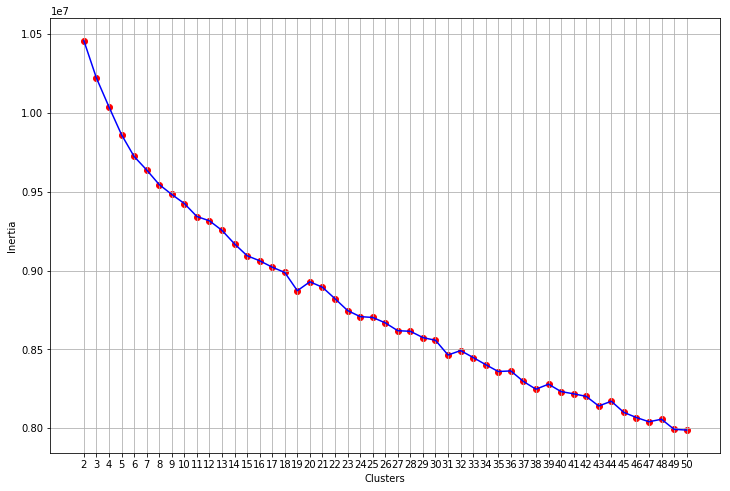

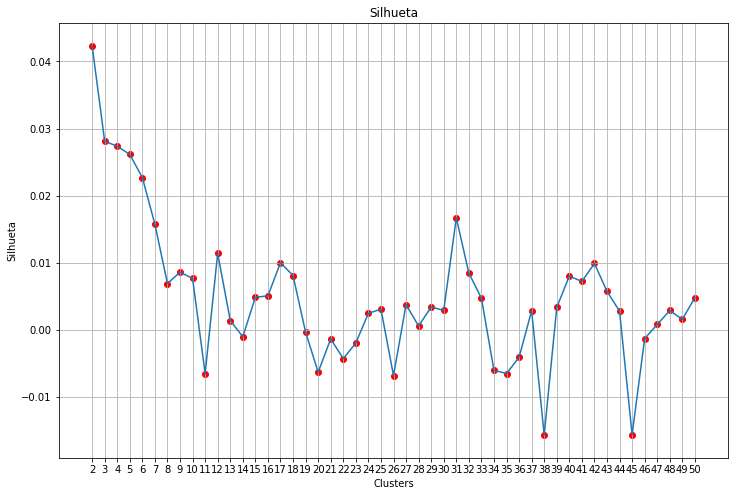

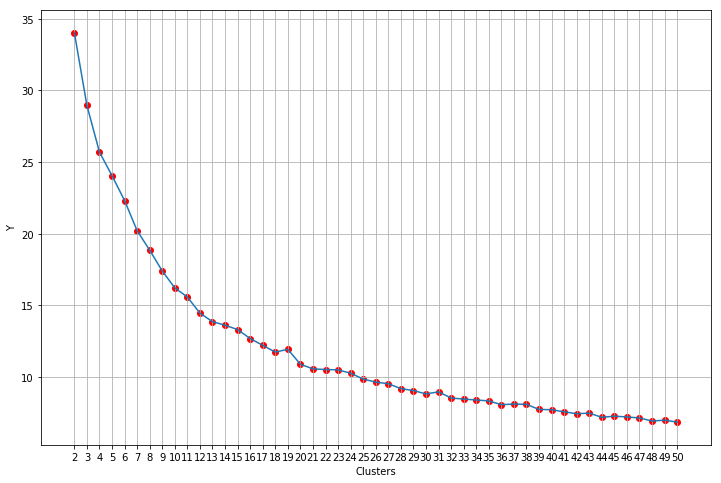

NameError: name 'result' is not defined

In [6]:
kmeans_analysis(data.iloc[:1000, 1:5000], [2,50])

### Referências

[Clustering no scikit](http://scikit-learn.org/stable/modules/clustering.html#k-means)  
[Notebook KMeans e Elbow Method](https://github.com/llSourcell/k_means_clustering/blob/master/kmeans.py.ipynb)  
[Livro](https://www.saraiva.com.br/data-mining-practical-machine-learning-tools-and-techniques-3442869.html) 